# Amazon Reviews Sentiment Analysis 

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [2]:
# Load the data
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')
reviews_df.head()

# data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### Data Exploration

<AxesSubplot:>

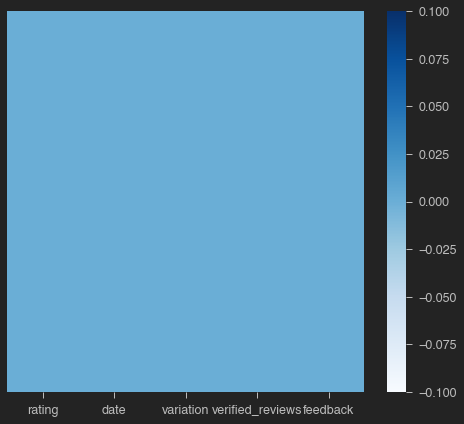

In [5]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cmap = "Blues")

<AxesSubplot:xlabel='rating', ylabel='count'>

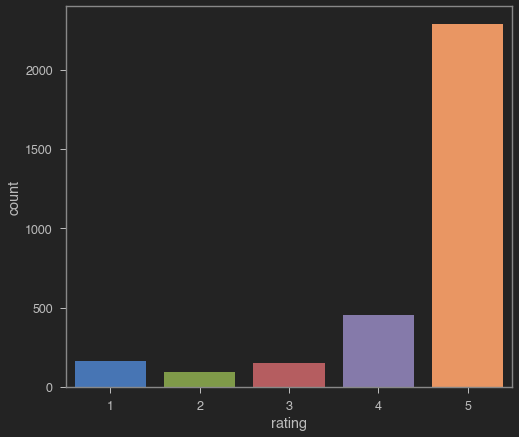

In [6]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating']) 

<AxesSubplot:xlabel='feedback', ylabel='count'>

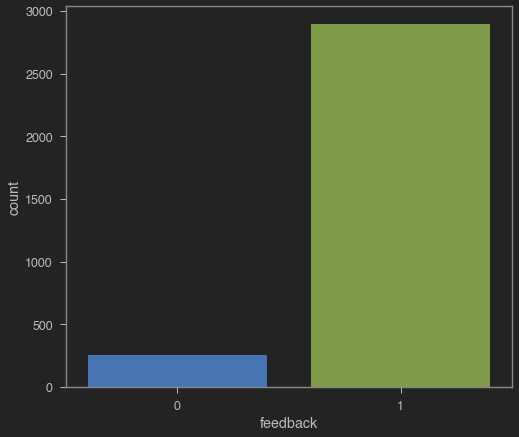

In [7]:
# Plot the count plot for the feedback
sns.countplot(x = reviews_df['feedback']) 

In [8]:
# Check the length of the reviews
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

<AxesSubplot:ylabel='Frequency'>

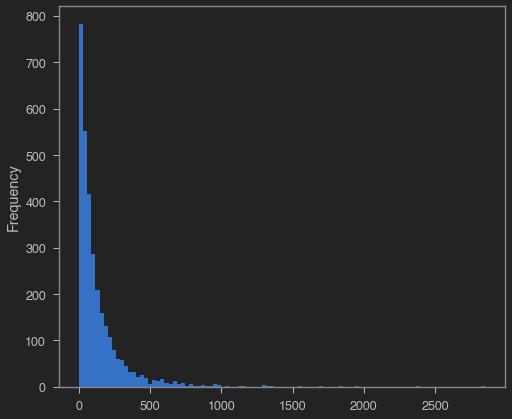

In [9]:
# Plot the count plot for the length
reviews_df['length'].plot(bins = 100, kind = 'hist') 

In [10]:
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [11]:
# Examples of reviews with min, average, and max length
# min
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [12]:
# max
reviews_df[reviews_df['length'] == 2851]['verified_reviews'] #.iloc[0]

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [13]:
# average
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [14]:
# positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]

In [15]:
# negative reviews
negative = reviews_df[reviews_df['feedback'] == 0]

## WordCloud for all, positive, and negative reviews

In [16]:
reviews_sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string = " ".join(reviews_sentences)

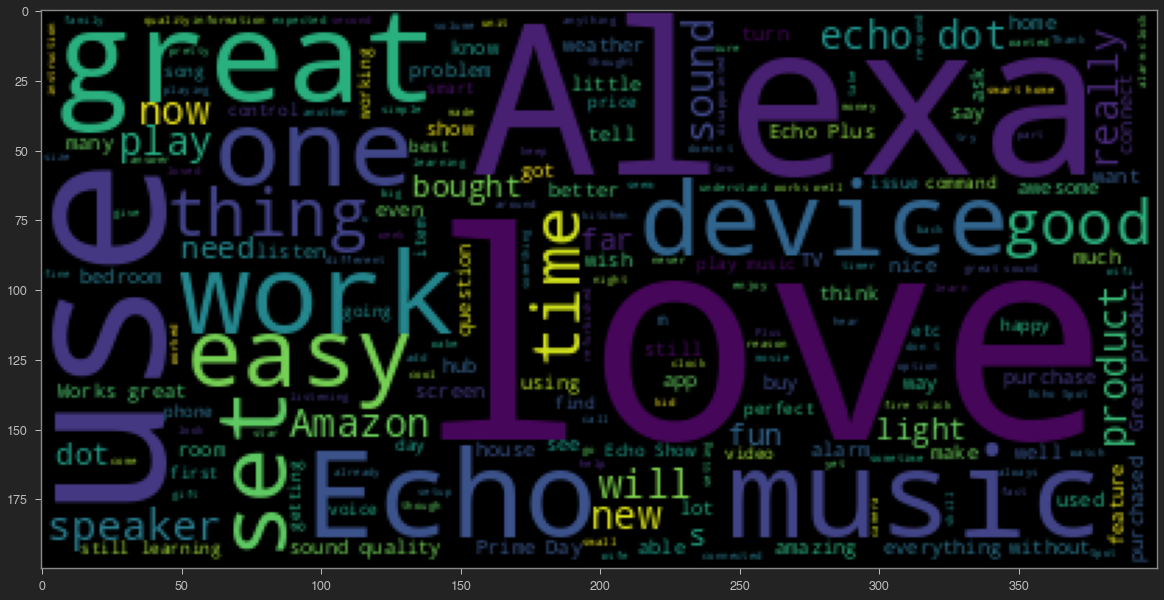

In [17]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [18]:
# same for negative reviews only
negative_sentences = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = " ".join(negative_sentences)

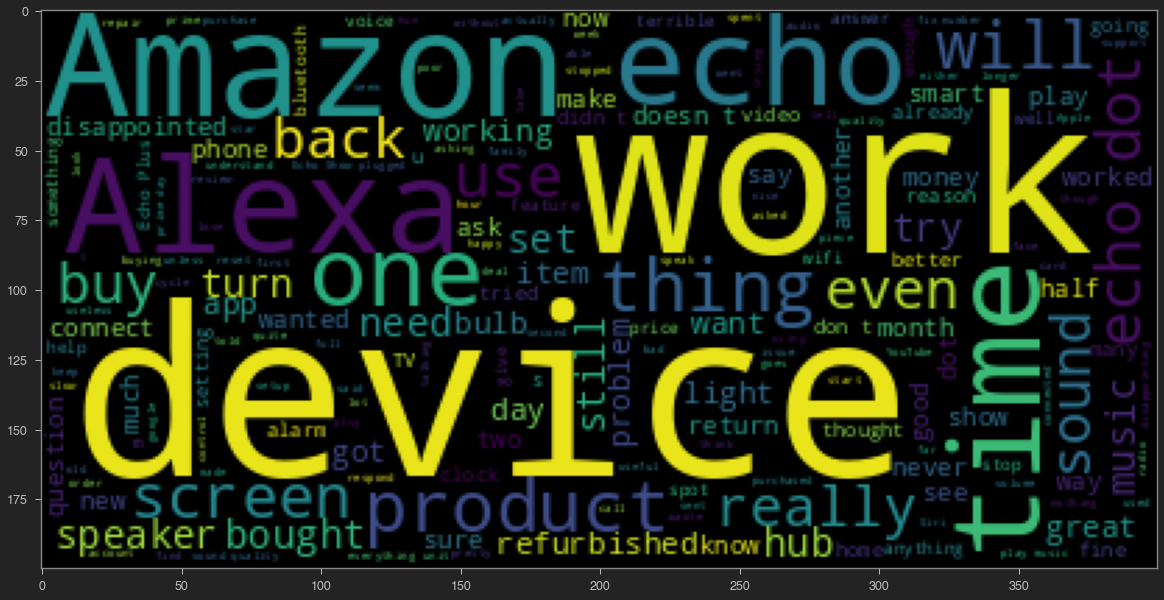

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

## Data Cleaning

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a_doriti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def review_cleaning(review):
    review_no_punctuation = [char for char in review if char not in string.punctuation]
    review_no_punctuation_join = ''.join(review_no_punctuation)
    review_no_punctuation_join_clean = [word for word in review_no_punctuation_join.split() if word.lower() not in stopwords.words('english')]
    return review_no_punctuation_join_clean


In [23]:
reviews_df_clean = reviews_df['verified_reviews'].apply(review_cleaning)

In [24]:
# check an example
print(reviews_df['verified_reviews'][20])
print(reviews_df_clean[20])

Love the Echo and how good the music sounds playing off it. Alexa understands most commands but it is difficult at times for her to find specific playlists or songs on Spotify. She is good with Amazon Music but is lacking in other major programs.
['Love', 'Echo', 'good', 'music', 'sounds', 'playing', 'Alexa', 'understands', 'commands', 'difficult', 'times', 'find', 'specific', 'playlists', 'songs', 'Spotify', 'good', 'Amazon', 'Music', 'lacking', 'major', 'programs']


## Model 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = review_cleaning, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [26]:
vectorizer.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

In [27]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
reviews_countvectorizer.shape

(3150, 5211)

In [29]:
X = pd.DataFrame(reviews_countvectorizer.toarray())


In [30]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y = reviews_df['feedback']

In [32]:
X.shape

(3150, 5211)

In [33]:
y.shape

(3150,)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

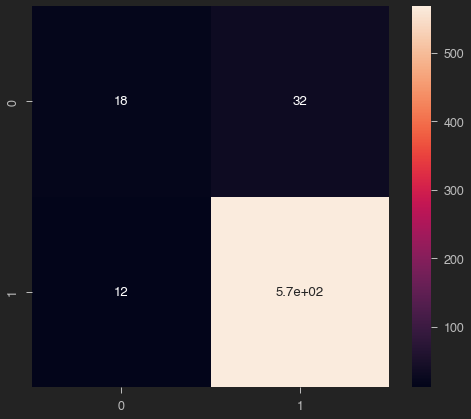

In [37]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45        50
           1       0.95      0.98      0.96       580

    accuracy                           0.93       630
   macro avg       0.77      0.67      0.71       630
weighted avg       0.92      0.93      0.92       630



### Logistic Regression Model

              precision    recall  f1-score   support

           0       0.78      0.36      0.49        50
           1       0.95      0.99      0.97       580

    accuracy                           0.94       630
   macro avg       0.86      0.68      0.73       630
weighted avg       0.93      0.94      0.93       630



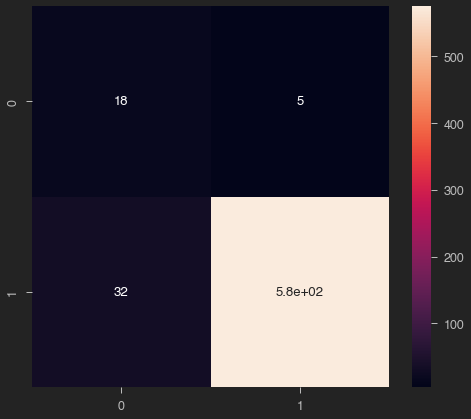

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

### Gradient Boosted Trees

              precision    recall  f1-score   support

           0       0.73      0.16      0.26        50
           1       0.93      0.99      0.96       580

    accuracy                           0.93       630
   macro avg       0.83      0.58      0.61       630
weighted avg       0.92      0.93      0.91       630



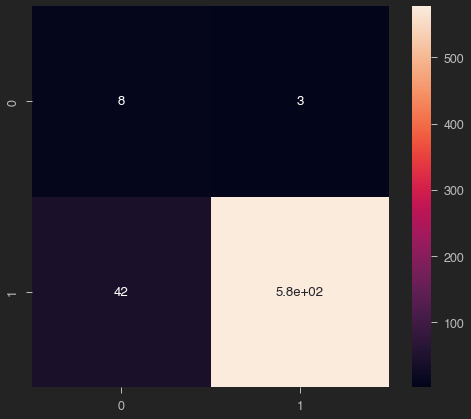

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))